In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

sns.set_style('whitegrid')

In [2]:
df = pd.read_excel(r'C:\Users\Marco\Documents\jupyter_notebook\nba_offense.xlsx')
df2 = pd.read_excel(r'C:\Users\Marco\Documents\jupyter_notebook\nba_opponent.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        300 non-null    object 
 1   wins        300 non-null    int64  
 2   pace        300 non-null    float64
 3   ftr         300 non-null    float64
 4   3par        300 non-null    float64
 5   ts%         300 non-null    float64
 6   playoffs    300 non-null    int64  
 7   year        300 non-null    int64  
 8   fg%         300 non-null    float64
 9   dist        300 non-null    float64
 10  2p_fga      300 non-null    float64
 11  0_3_fga     300 non-null    float64
 12  3_10_fga    300 non-null    float64
 13  10_16_fga   300 non-null    float64
 14  16_3pt_fga  300 non-null    float64
 15  3p_fga      300 non-null    float64
 16  2p_fg       300 non-null    float64
 17  0_3_fg      300 non-null    float64
 18  3_10_fg     300 non-null    float64
 19  10_16_fg    300 non-null    f

## EDA 

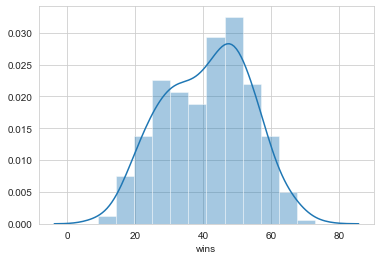

In [4]:
sns.distplot(df['wins'])

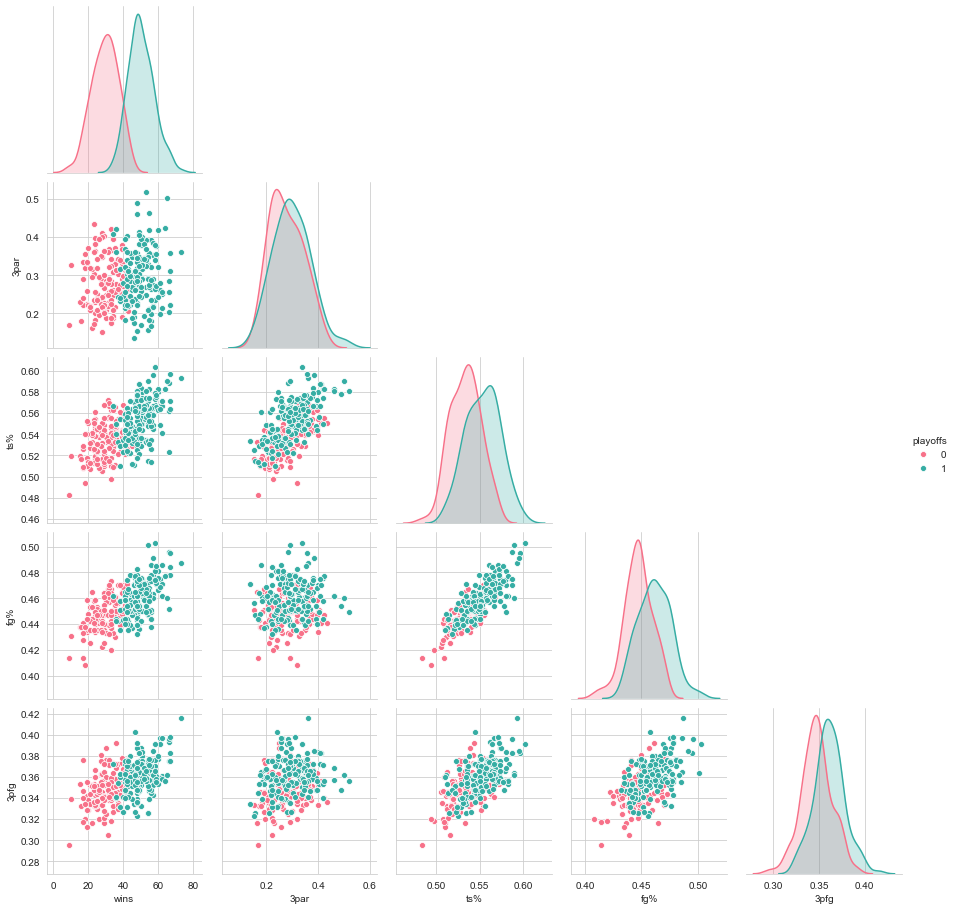

In [5]:
df_corr1 = df[['wins', '3par', 'ts%', 'fg%', '3pfg', 'playoffs']]
sns.pairplot(df_corr1, hue = 'playoffs', corner = True, palette = 'husl')

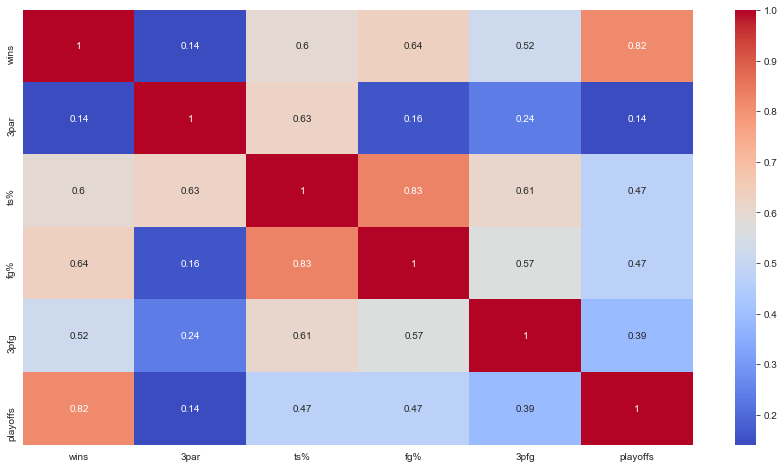

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr1.corr(), cmap = 'coolwarm', annot = True)

In [7]:
nba11 = df[df.year == 2011].mean()
nba12 = df[df.year == 2012].mean()
nba13 = df[df.year == 2013].mean()
nba14 = df[df.year == 2014].mean()
nba15 = df[df.year == 2015].mean()
nba16 = df[df.year == 2016].mean()
nba17 = df[df.year == 2017].mean()
nba18 = df[df.year == 2018].mean()
nba19 = df[df.year == 2019].mean()
nba20 = df[df.year == 2020].mean()

nba_series = [nba11, nba12, nba13, nba14, nba15, nba16, nba17, nba18, nba19, nba20]

In [8]:
year_df = pd.DataFrame(nba_series)

In [9]:
pd.to_datetime(year_df.year, format='%Y')

0   2011-01-01
1   2012-01-01
2   2013-01-01
3   2014-01-01
4   2015-01-01
5   2016-01-01
6   2017-01-01
7   2018-01-01
8   2019-01-01
9   2020-01-01
Name: year, dtype: datetime64[ns]

[Text(0.5, 1.0, '3PFG% from 2011-2020')]

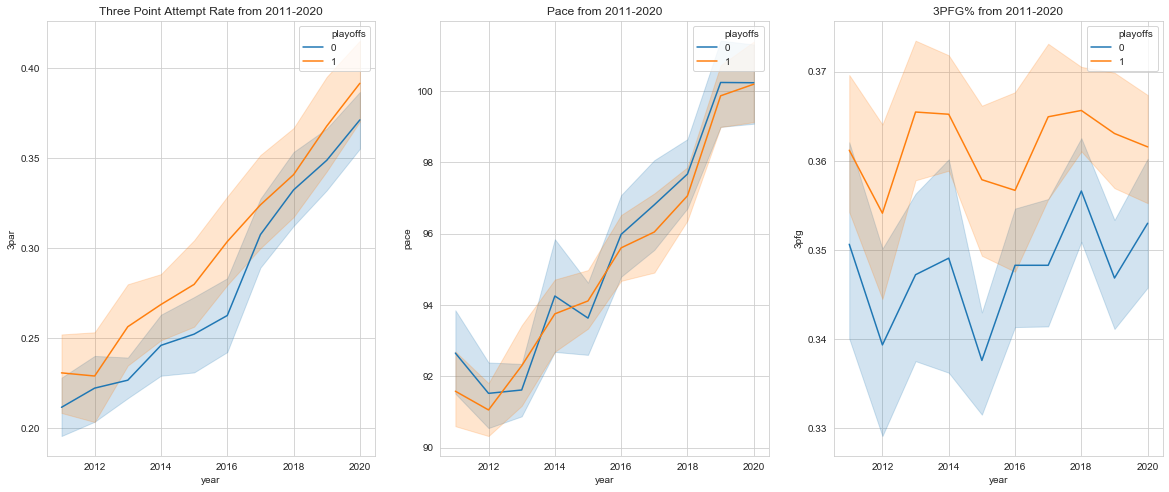

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))

ax1 = sns.lineplot(x = 'year', y = '3par', data = df, hue = 'playoffs', ax = ax1 )
ax1.set(title = 'Three Point Attempt Rate from 2011-2020')
ax2 = sns.lineplot(x = 'year', y = 'pace', hue = 'playoffs', data = df, ax = ax2)
ax2.set(title = 'Pace from 2011-2020')
ax3 = sns.lineplot(x = 'year', y = '3pfg', hue = 'playoffs', data = df, ax = ax3)
ax3.set(title = '3PFG% from 2011-2020')

[Text(0.5, 1.0, 'Corner Three Pointer Attempt Rate from 2011-2020')]

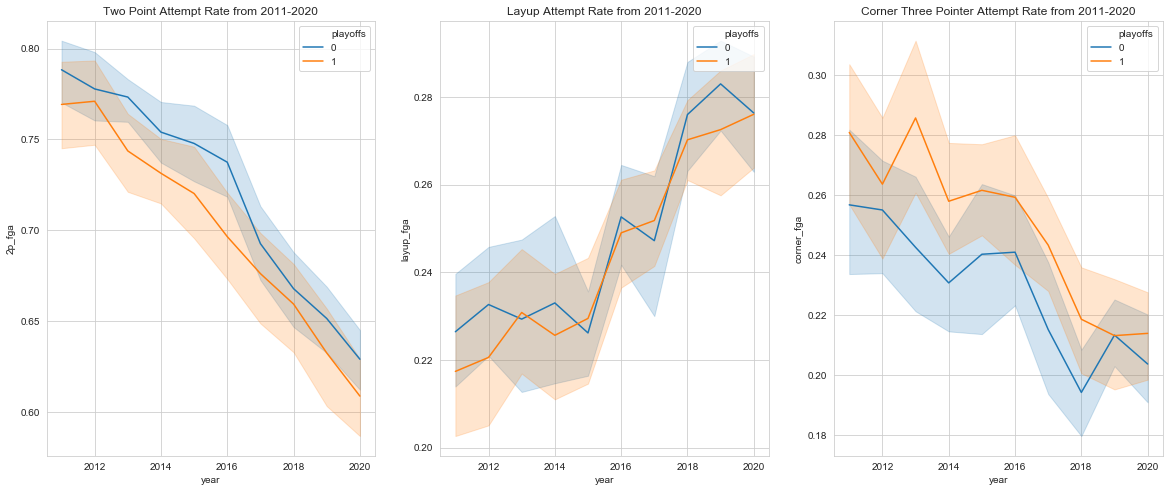

In [11]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))

ax1 = sns.lineplot(x = 'year', y = '2p_fga', hue = 'playoffs', data = df, ax=ax1)
ax1.set(title = 'Two Point Attempt Rate from 2011-2020')
ax2 = sns.lineplot(x = 'year', y = 'layup_fga', hue = 'playoffs', data = df, ax = ax2)
ax2.set(title = 'Layup Attempt Rate from 2011-2020')
ax3 = sns.lineplot(x = 'year', y='corner_fga', hue = 'playoffs', data = df, ax = ax3)
ax3.set(title = 'Corner Three Pointer Attempt Rate from 2011-2020')

[Text(0.5, 1.0, '%FGA from behind the 3point line')]

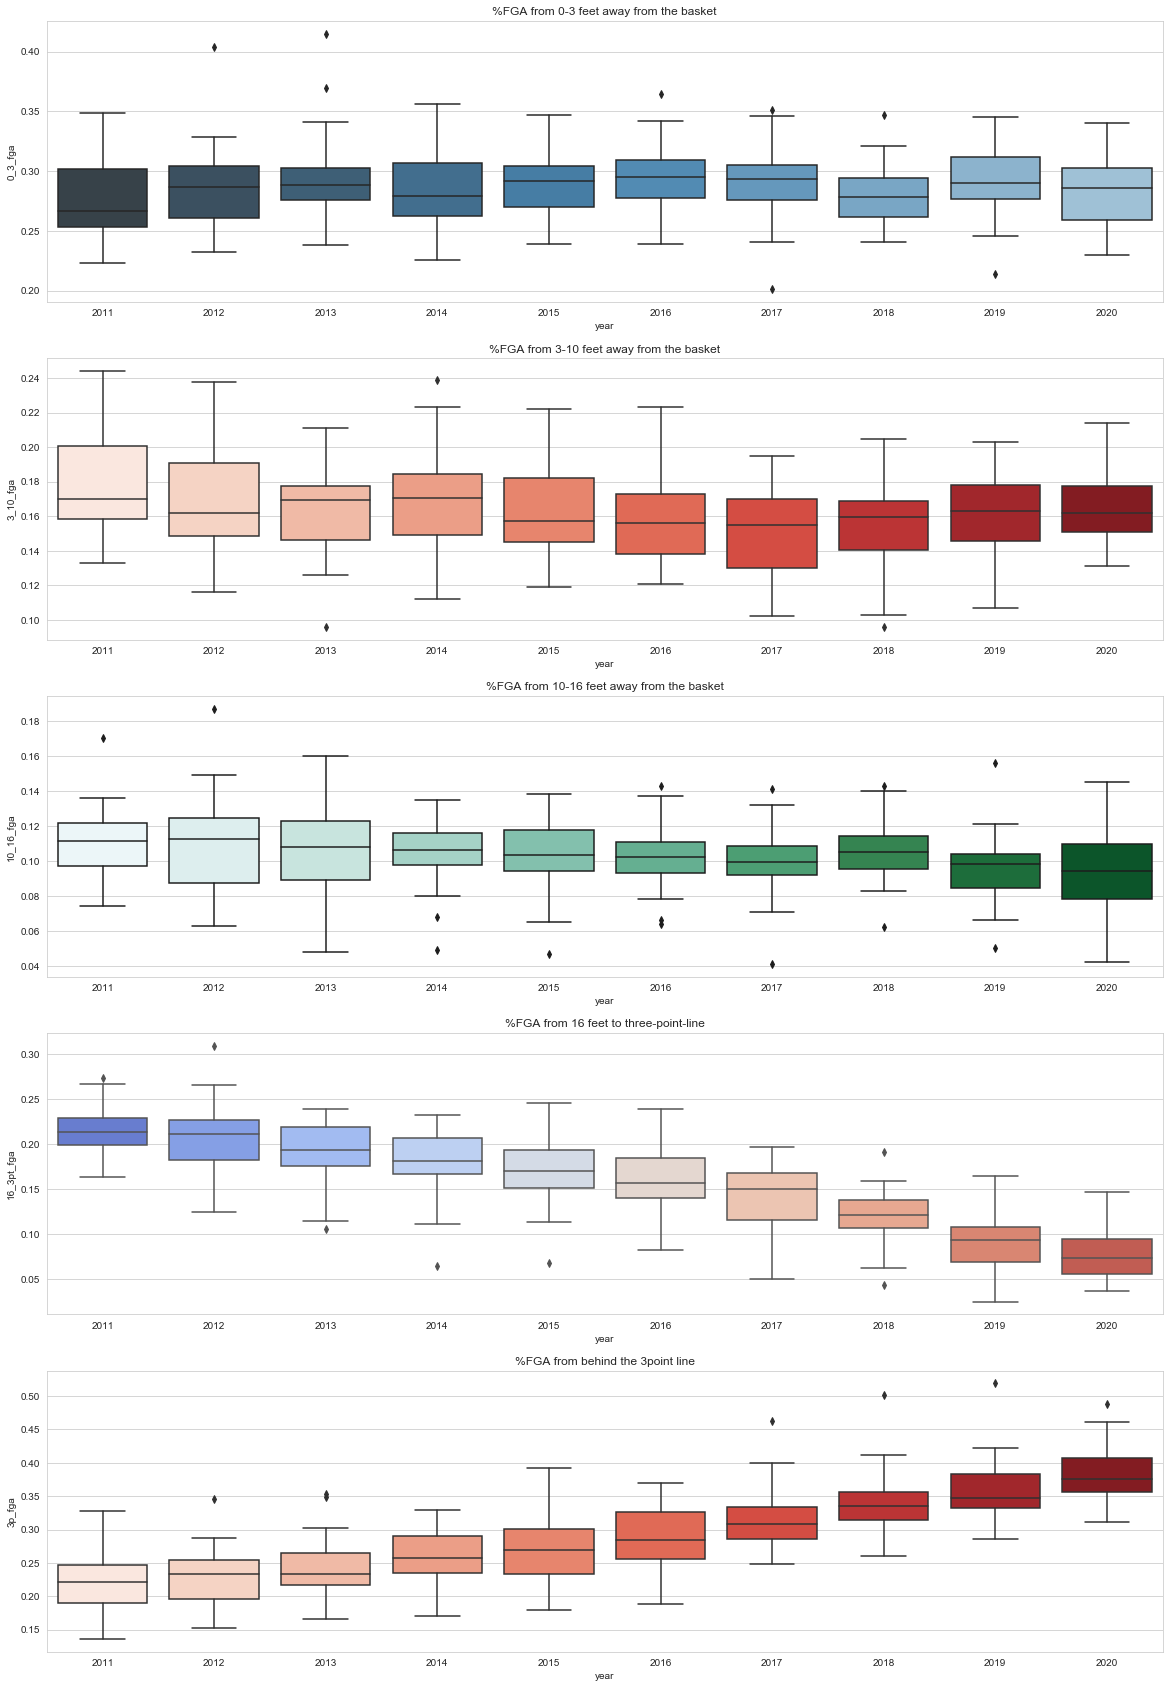

In [12]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (20,30))

ax1 = sns.boxplot(x='year', y='0_3_fga', data = df, ax = ax1, palette = 'Blues_d')
ax1.set(title = '%FGA from 0-3 feet away from the basket')
ax2 = sns.boxplot(x = 'year', y = '3_10_fga', data = df, ax = ax2, palette = 'Reds')
ax2.set(title = '%FGA from 3-10 feet away from the basket')
ax3 = sns.boxplot(x='year', y='10_16_fga', data=df, ax = ax3, palette = 'BuGn')
ax3.set(title = '%FGA from 10-16 feet away from the basket')
ax4 = sns.boxplot(x='year', y='16_3pt_fga',data=df, ax = ax4, palette = 'coolwarm')
ax4.set(title = '%FGA from 16 feet to three-point-line')
ax5 = sns.boxplot(x='year', y='3p_fga', data=df, ax = ax5, palette = 'Reds')
ax5.set(title = '%FGA from behind the 3point line')

[Text(0.5, 1.0, 'Percentage of assisted 3-point field goals')]

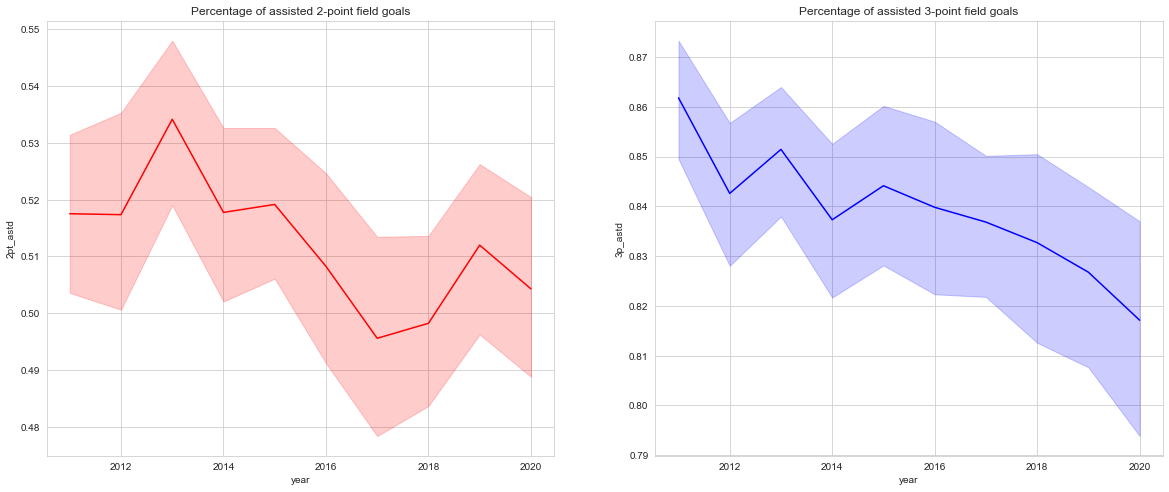

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))

ax1 = sns.lineplot(x='year', y = '2pt_astd', data = df, color = 'red', ax = ax1)
ax1.set( title = 'Percentage of assisted 2-point field goals')
ax2 = sns.lineplot(x = 'year', y = '3p_astd', data = df, color = 'blue', ax = ax2)
ax2.set( title = 'Percentage of assisted 3-point field goals')

[(11, 14.756087500000005),
 Text(0.5, 1.0, 'Average Distance of attempted shots away in feet from basket')]

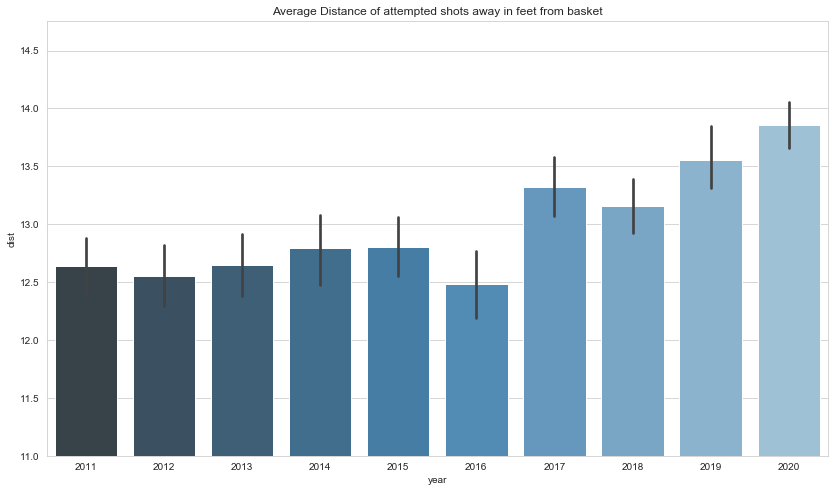

In [14]:
plt.figure(figsize = (14,8))

g = sns.barplot(x = 'year', y = 'dist', data = df, palette = 'Blues_d')
g.set(ylim = (11, None), title = 'Average Distance of attempted shots away in feet from basket')

[Text(0.5, 1.0, 'Relationship between Assisted Two Pointers and Regular Seasons Wins')]

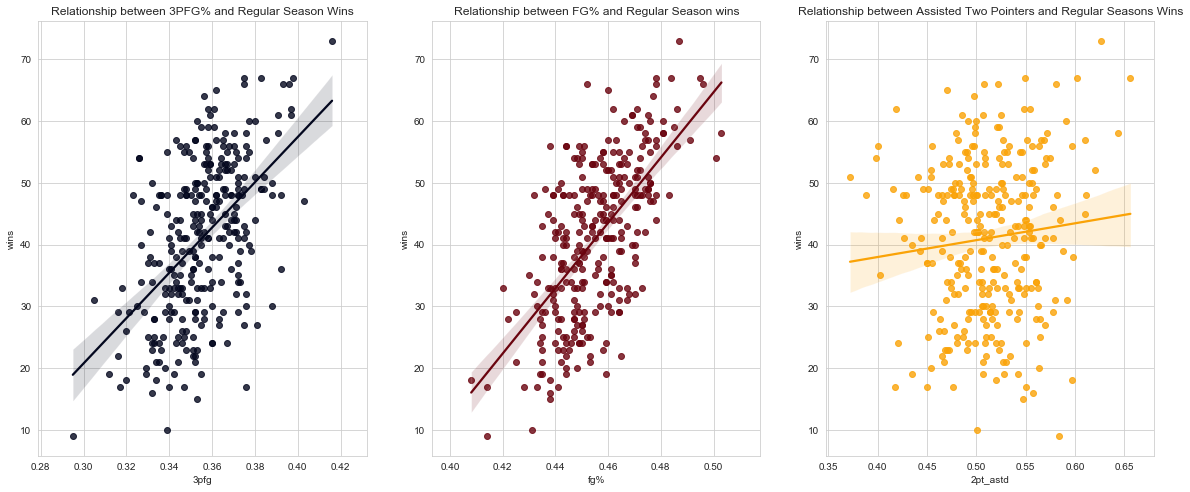

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

ax1 = sns.regplot(x = '3pfg', y = 'wins', data = df, ax = ax1, color = '#03071e')
ax1.set(title = 'Relationship between 3PFG% and Regular Season Wins')
ax2 = sns.regplot(x = 'fg%', y = 'wins', data = df, ax = ax2, color = '#6a040f')
ax2.set(title = 'Relationship between FG% and Regular Season wins')
ax3 = sns.regplot(x = '2pt_astd', y = 'wins', data =df, ax = ax3, color = '#faa307')
ax3.set(title = 'Relationship between Assisted Two Pointers and Regular Seasons Wins')

## Preprocessing

In [16]:
df.set_index('Team', inplace = True)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df = df[['pace', '3par', 'dist', '2p_fga', '0_3_fga', '3_10_fga', '10_16_fga', '16_3pt_fga', '3p_fga',
       '3pfg', '2pt_astd', '3p_astd', 'layup_fga', 'corner_fga', 'playoffs', 'ts%', 'fg%']]

scale_df = df.drop('playoffs', axis = 1)
scale_attribs = list(scale_df)

ct = ColumnTransformer([
    ('scaler', StandardScaler(), scale_attribs)
], remainder = 'passthrough')

ct.fit_transform(df)

array([[-1.62192928, -0.97517495,  0.60984071, ..., -0.1486608 ,
         0.43834781,  1.        ],
       [-1.32432758, -1.58012815, -1.03520166, ...,  0.74992515,
         2.01639991,  1.        ],
       [-1.54076518, -1.45049532, -1.15270469, ..., -0.81077676,
        -0.28492607,  0.        ],
       ...,
       [ 1.43525185,  1.84793997,  1.07985281, ...,  1.36474712,
         0.17533912,  1.        ],
       [ 0.84004844,  1.6750962 ,  1.07985281, ...,  1.97956909,
         1.29312603,  1.        ],
       [ 2.03045526,  1.070143  ,  1.43236189, ...,  1.08098314,
         0.37259564,  0.        ]])

## Machhine Learning Models

##### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

rf = Pipeline(steps=[('preprocessing', ct),
                    ('classifier', RandomForestClassifier(random_state = 77))
                    ])

X = df[['pace', '3par', 'dist', '2p_fga', '0_3_fga', '3_10_fga', '10_16_fga', '16_3pt_fga', '3p_fga',
       '3pfg', '2pt_astd', '3p_astd', 'layup_fga', 'corner_fga', 'fg%', 'ts%']]

y = df['playoffs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_report = classification_report(rf_pred, y_test)
rf_score = metrics.accuracy_score(rf_pred, y_test)
print(rf_report)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        36
           1       0.72      0.72      0.72        39

    accuracy                           0.71        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.71      0.71      0.71        75



###### KNeighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[('preprocessing', ct),
                    ('classifier', KNeighborsClassifier())
                    ])

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = metrics.accuracy_score(knn_pred, y_test)
knn_report = classification_report(knn_pred, y_test)
print(knn_report)

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        43
           1       0.67      0.81      0.73        32

    accuracy                           0.75        75
   macro avg       0.75      0.76      0.75        75
weighted avg       0.76      0.75      0.75        75



###### Support Vector Classifier

In [20]:
from sklearn.svm import SVC

svm = Pipeline(steps=[('preprocessing', ct),
                    ('classifier', SVC(random_state = 77))
                    ])

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_score = metrics.accuracy_score(svm_pred, y_test)
svm_report = classification_report(svm_pred, y_test)
print(svm_report)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        40
           1       0.74      0.83      0.78        35

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75



###### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline(steps=[('preprocessing', ct),
                    ('classifier', LogisticRegression(random_state = 77))
                    ])

logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_score = metrics.accuracy_score(logreg_pred, y_test)
logreg_report = classification_report(logreg_pred, y_test)
print(logreg_report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.77      0.81      0.79        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75



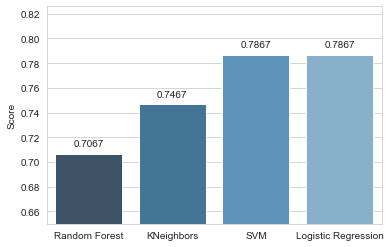

In [22]:
d = {'Model': ['Random Forest', 'KNeighbors', 'SVM', 'Logistic Regression'], 'Score': [rf_score, knn_score, svm_score, logreg_score]}

df_score = pd.DataFrame(data = d)

g = sns.barplot(x = 'Model', y = 'Score', data = df_score, palette = 'Blues_d')
g.set(ylim = 0.65, xlabel = '')

for p in g.patches:
    g.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,10), textcoords = 'offset points')

## Hyperparamter Tuning

###### KNeighbors

In [23]:
k_range = range(1,21)

k_scores = []

for k in k_range:
    knn2 = Pipeline(steps=[('preprocessing', ct),
                    ('classifier', KNeighborsClassifier(n_neighbors = k))
                    ])
    knn2.fit(X_train, y_train)
    knn2_pred = knn2.predict(X_test)
    knn2_scores = metrics.accuracy_score(knn2_pred, y_test)
    k_scores.append(knn2_scores)
    

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'N Neighbors')]

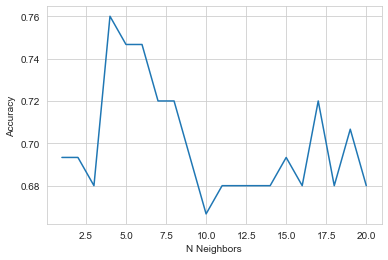

In [24]:
g = sns.lineplot(k_range, k_scores)
g.set(xlabel = 'N Neighbors', ylabel = 'Accuracy')

In [25]:
knn_grid = Pipeline(steps=[('preprocessing', ct),
                    ('classifier', KNeighborsClassifier(n_neighbors = 4))
                    ])

knn_grid.fit(X_train, y_train)
knn_grid_pred = knn_grid.predict(X_test)
knn_grid_score = metrics.accuracy_score(knn_grid_pred, y_test)
knn_grid_report = classification_report(knn_grid_pred, y_test)
print('Improvement of (%): ', ((knn_grid_score - knn_score)*100).round(2))

Improvement of (%):  1.33


###### SVM

In [27]:
from sklearn.model_selection import GridSearchCV

grid = {
       'C': [0.1, 1, 10],
       'gamma': [1, 0.1, 0.01],
       'kernel': ['rbf', 'poly', 'sigmoid']
       }

svm_grid = Pipeline(steps=[('preprocessing', ct),
                           ('grid_search', GridSearchCV(estimator=SVC(), param_grid=grid))
                           ])

svm_grid.fit(X_train, y_train)
svm_grid.named_steps['grid_search'].best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
svm_grid_pred = svm_grid.predict(X_test)
svm_grid_score = metrics.accuracy_score(svm_grid_pred, y_test)
svm_grid_report = classification_report(svm_grid_pred, y_test)
print('Improvement of (%): ', ((svm_grid_score - svm_score)*100).round(2))

Improvement of (%):  0.0


###### Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline

n_estimators = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

n_scores = []

for n in n_estimators:
    bclf = make_pipeline(ct, BaggingClassifier(n_estimators = n, random_state = 44))
    bclf.fit(X_train, y_train)
    bclf_pred = bclf.predict(X_test)
    scores = metrics.accuracy_score(bclf_pred, y_test)
    n_scores.append(scores)

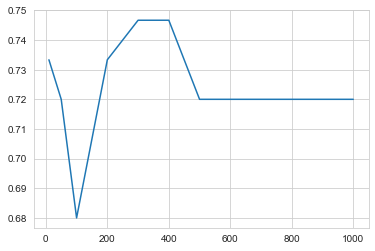

In [30]:
g = sns.lineplot(n_estimators, n_scores)

In [31]:
bclf_final = make_pipeline(ct, BaggingClassifier(n_estimators = 300, random_state = 44))
bclf_final.fit(X_train, y_train)
bclf_final_pred = bclf_final.predict(X_test)
bclf_final_score = metrics.accuracy_score(bclf_final_pred, y_test)
print('Accuracy Baggin Classifier (%):', bclf_final_score.round(4)*100)

Accuracy Baggin Classifier (%): 74.67


###### Ada Boost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

aclf = make_pipeline(ct, AdaBoostClassifier(random_state = 10))
aclf.fit(X_train, y_train)
aclf_pred = aclf.predict(X_test)
aclf_score = metrics.accuracy_score(y_test, aclf_pred)
print('Accuracy Ada Boost (%):', aclf_score.round(4)*100)

Accuracy Ada Boost (%): 65.33


###### Stacking Classifier

In [33]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('knn', make_pipeline(ct, KNeighborsClassifier(n_neighbors = 4))),
    ('svc', make_pipeline(ct, SVC(random_state = 77)))
]

sclf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression(random_state = 77))
sclf.fit(X_train, y_train)
sclf_pred = sclf.predict(X_test)
sclf_score = metrics.accuracy_score(y_test, sclf_pred)
print('Accuracy Stacking Classifire (%)', sclf_score.round(4)*100)

Accuracy Stacking Classifire (%) 77.33


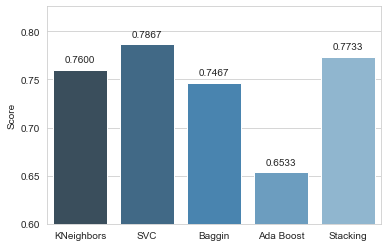

In [34]:
d2 = {'Model': ['KNeighbors', 'SVC', 'Baggin', 'Ada Boost', 'Stacking'], 'Score': [knn_grid_score, svm_grid_score, bclf_final_score, aclf_score, sclf_score]}

df_score2 = pd.DataFrame(data = d2)

g = sns.barplot(x='Model', y='Score', data=df_score2, palette='Blues_d')
g.set(ylim=0.60, xlabel='')
for p in g.patches:
    g.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,10), textcoords = 'offset points')